In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import base64


In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

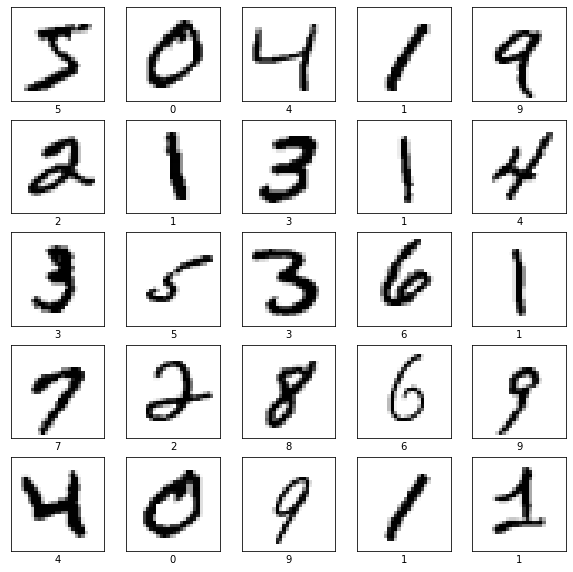

In [4]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X=np.squeeze(train_images[i]), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
#plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(filters=5,kernel_size=(3, 3),strides=(2,2),name='Conv1', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(filters=5, kernel_size=(3, 3),strides=(1,1),name='Conv2', activation='relu'))
model.add(layers.Conv2D(filters=5, kernel_size=(3, 3) ,strides=(1,1),name='Conv3', activation='relu'))
model.add(layers.Flatten(name='Flatten'))
model.add(layers.Dense(16,name='Dense', activation='relu'))
model.add(layers.Dense(10,name='Soft', activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 13, 13, 5)         50        
_________________________________________________________________
Conv2 (Conv2D)               (None, 11, 11, 5)         230       
_________________________________________________________________
Conv3 (Conv2D)               (None, 9, 9, 5)           230       
_________________________________________________________________
Flatten (Flatten)            (None, 405)               0         
_________________________________________________________________
Dense (Dense)                (None, 16)                6496      
_________________________________________________________________
Soft (Dense)                 (None, 10)                170       
Total params: 7,176
Trainable params: 7,176
Non-trainable params: 0
______________________________________________________

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 13, 13, 5)         50        
_________________________________________________________________
Conv2 (Conv2D)               (None, 11, 11, 5)         230       
_________________________________________________________________
Conv3 (Conv2D)               (None, 9, 9, 5)           230       
_________________________________________________________________
Flatten (Flatten)            (None, 405)               0         
_________________________________________________________________
Dense (Dense)                (None, 16)                6496      
_________________________________________________________________
Soft (Dense)                 (None, 10)                170       
Total params: 7,176
Trainable params: 7,176
Non-trainable params: 0
______________________________________________________

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))
#history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3142 - accuracy: 0.9040 - val_loss: 0.1217 - val_accuracy: 0.9644
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1076 - accuracy: 0.9682 - val_loss: 0.0767 - val_accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0840 - accuracy: 0.9748 - val_loss: 0.0725 - val_accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0717 - accuracy: 0.9784 - val_loss: 0.0566 - val_accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0636 - accuracy: 0.9811 - val_loss: 0.0659 - val_accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0570 - accuracy: 0.9824 - val_loss: 0.0498 - val_accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0516 - accuracy: 0.9841 - val_loss: 0.0525 - val_accuracy:

In [9]:
def SaveModel(my_model,fileSTR):
    totalbytes=0
    Wmodel = open("./Mokka/"+fileSTR, "wb")
    for x in my_model.weights:
        nn = x.numpy()
        T = nn
        v = np.ndarray.tobytes(T)
        Wmodel.write(bytearray(v))
        totalbytes+=len(v)
        print(x.name, len(v)," dims:",nn.ndim," ", T.shape)
    Wmodel.close()
    print("Total bytes:"+str(totalbytes))


In [10]:
SaveModel(model,"CNN_T.weights")

Conv1/kernel:0 180  dims: 4   (3, 3, 1, 5)
Conv1/bias:0 20  dims: 1   (5,)
Conv2/kernel:0 900  dims: 4   (3, 3, 5, 5)
Conv2/bias:0 20  dims: 1   (5,)
Conv3/kernel:0 900  dims: 4   (3, 3, 5, 5)
Conv3/bias:0 20  dims: 1   (5,)
Dense/kernel:0 25920  dims: 2   (405, 16)
Dense/bias:0 64  dims: 1   (16,)
Soft/kernel:0 640  dims: 2   (16, 10)
Soft/bias:0 40  dims: 1   (10,)
Total bytes:28704


In [16]:
model.evaluate(test_images,  test_labels, verbose=1,batch_size=1)
model.evaluate(train_images,  train_labels, verbose=1,batch_size=1)

60000/60000 [==============================] - 40s 672us/step - loss: 0.0310 - accuracy: 0.9904


[0.031046591699123383, 0.9904166460037231]